In [64]:
#Ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
haber=pd.read_csv('haberman.csv')
haber.head()
#printing the head of the csv file

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [2]:
print(haber.shape)

(306, 4)


# Observation:
There are 306 data points and 4 features

In [3]:
print(haber.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
print(haber.describe())

              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


# Observation:
Patient's age at the time of operation is between 30 to 83 with mean 52 and 
maximum number of positive auxiliary nodes detected is 52 

In [5]:
print(haber['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


# Observation:
status of patient:
the patients who survived 5 years or longer are 225
and the patient died within 5 years are 81

In [6]:
print(haber['status'].describe())

count    306.000000
mean       1.264706
std        0.441899
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: status, dtype: float64


# Observation:
number of patient survived 5 years or longer is more than number of patient died within 5 years

In [9]:
print(haber["age"].iloc[5])

33


In [71]:
print(haber['age'].describe())

count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: age, dtype: float64


# Observation:
mean age of patient at the time of operation is 52

In [72]:
print(haber['year'].describe())

count    306.000000
mean      62.852941
std        3.249405
min       58.000000
25%       60.000000
50%       63.000000
75%       65.750000
max       69.000000
Name: year, dtype: float64


# Observation:
year of operation of all the patients is between 1958 to 1969

In [73]:
print(haber['nodes'].describe())

count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: nodes, dtype: float64


# Observation:
minimum auxiliary nodes detected are 0
and maximum auxilary nodes are 52

#  plots

2d scatter plot

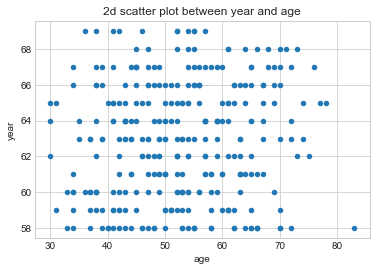

In [74]:
haber.plot(kind='scatter',x='age',y='year')
plt.title("2d scatter plot between year and age")
plt.show()

# Observation:
It is not possible to distinguish between age and year of patient at the time of operation by using scatter plot

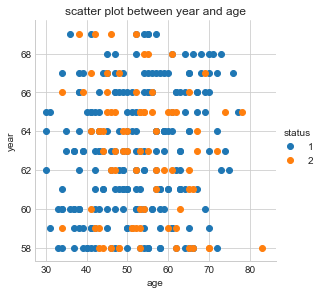

In [75]:
sns.set_style('whitegrid')
sns.FacetGrid(haber,hue='status',size=4)\
    .map(plt.scatter,'age','year')\
    .add_legend()
plt.title("scatter plot between year and age")
plt.show()

# Observation:
  1.Scatter plot between year and age gives us status 1 as blue points and status 2 as orange points.
  2.By using this scatter plot we are able to identify the data of status 1 and status 2.
  3.Data point of status 1 and status 2 are overlapping.

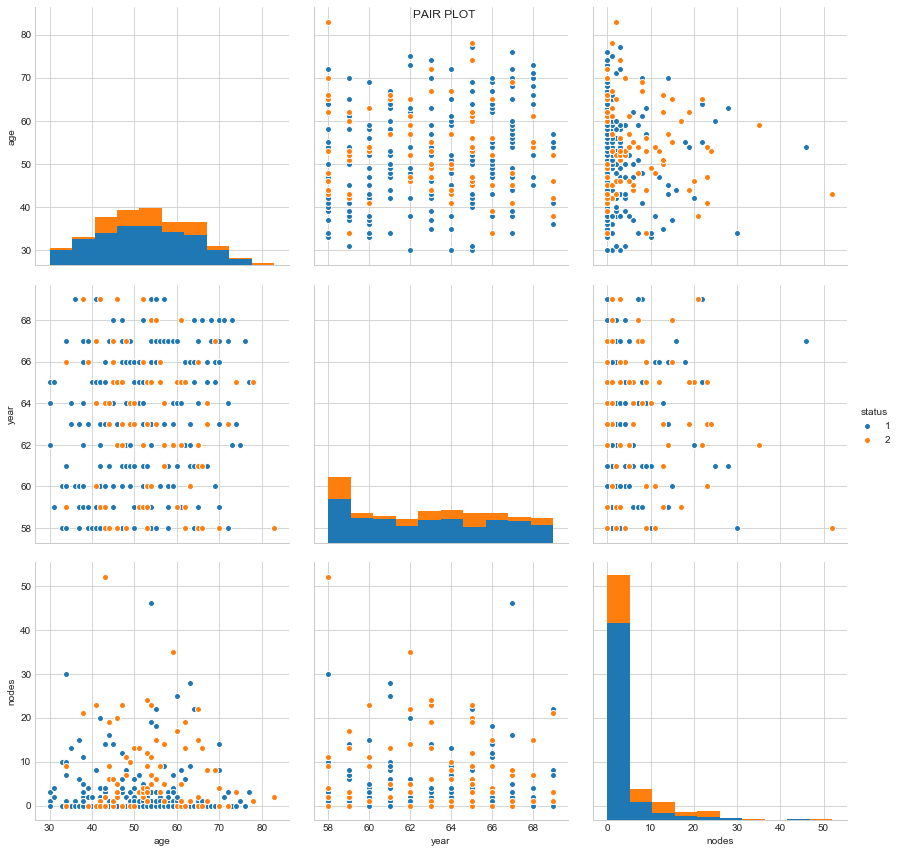

In [76]:
plt.close()
sns.set_style('whitegrid')
#haber['status']=haber['status'].apply(lambda x: ‘Positive’ if x == 1 else ‘Negative’)
sns.pairplot(haber,hue='status',vars=['age','year','nodes'],size=4)
plt.suptitle("PAIR PLOT")
plt.show()

# Observation:
By plotting scatter plot between age and year,age and nodes,year and nodes data points of status with 1 and 2 are overlapping so we are unable to distinguish between status

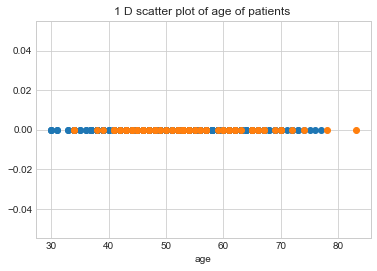

In [96]:
haber_1=haber.loc[haber['status']==1]
haber_2=haber.loc[haber['status']==2]
plt.plot(haber_1['age'],np.zeros_like(haber_1['age']),'o')
plt.plot(haber_2['age'],np.zeros_like(haber_2['age']),'o')
#plt.plot(haber_1['year'],np.zeros_like(haber_1['year']),'o')
#plt.plot(haber_2['year'],np.zeros_like(haber_2['year']),'o')
#plt.plot(haber_1['nodes'],np.zeros_like(haber_1['nodes']),'o')
#plt.plot(haber_2['nodes'],np.zeros_like(haber_2['nodes']),'o')
plt.title("1 D scatter plot of age of patients ")
plt.xlabel("age")
plt.show()

# Observation:
By this plot we can see that the data points of status 1 and 2 are overlapping so we can't conclude anything on this data.

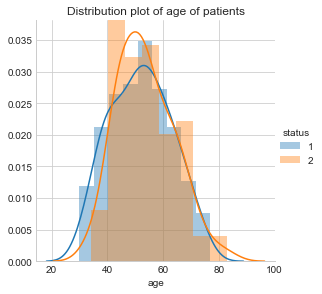

In [78]:
sns.FacetGrid(haber,hue='status',size=4)\
    .map(sns.distplot,'age')\
    .add_legend()
plt.title("Distribution plot for age of patients")
plt.show()

# Observation:
Distribution plot of age are overlapping very much so we are unable to identify the status

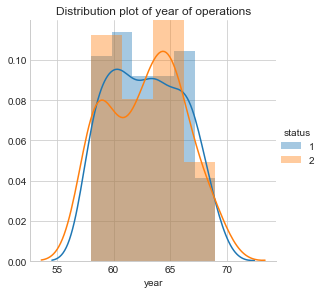

In [79]:
sns.FacetGrid(haber,hue='status',size=4)\
    .map(sns.distplot,'year')\
    .add_legend()
plt.title("Distribution plot for year of operations")
plt.show()

# Observation:
Distribution plot of year are overlapping very much so we are unable to identify the status

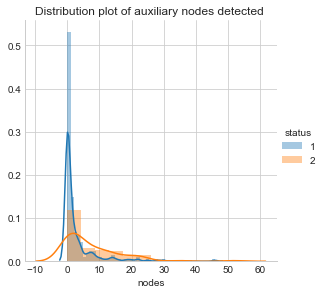

In [80]:
sns.FacetGrid(haber,hue='status',size=4)\
    .map(sns.distplot,'nodes')\
    .add_legend()
plt.title("Distribution plot for auxiliary nodes detected ")
plt.show()

# Observation:
feature nodes are useful than age and year for determining the status of patients as it has been observed that people survived long if they have less auxillary nodesand vice versa.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


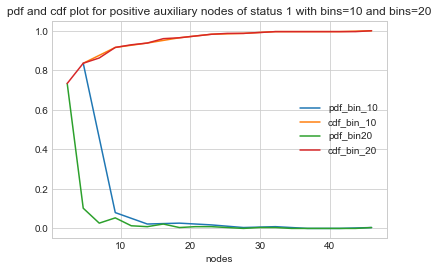

In [97]:
counts,bin_edges=np.histogram(haber_1['nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges=np.histogram(haber_1['nodes'],bins=20,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("nodes")
plt.title("pdf and cdf plot for positive auxiliary nodes of status 1 with bins=10 and bins=20")
plt.legend(["pdf_bin_10","cdf_bin_10","pdf_bin20","cdf_bin_20"])
plt.show()

In [82]:
print(haber['nodes'].max())

52


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


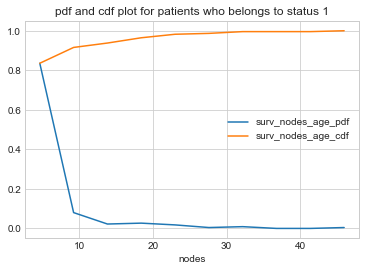

In [98]:
counts,bin_edges=np.histogram(haber_1['nodes'],bins=10)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("nodes")
plt.title("pdf and cdf plot for patients who belongs to status 1")
plt.legend(['surv_nodes_age_pdf','surv_nodes_age_cdf'])
plt.show()

# Observation:
100% of the patients with status 1 had less than 40 auxiliary nodes detected.
80% of the patients with status 1 had less than 2 auxiliary nodes detected.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


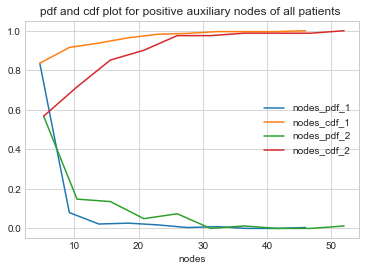

In [99]:
couunts,bin_edges=np.histogram(haber_1['nodes'],bins=10)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges=np.histogram(haber_2['nodes'],bins=10)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("nodes")
plt.title("pdf and cdf plot for positive auxiliary nodes of all patients ")
plt.legend(['nodes_pdf_1','nodes_cdf_1','nodes_pdf_2','nodes_cdf_2'])

plt.show()

# Observaion:
    100% of patients with status 1 had less than 45 auxiliary nodes and 85% of patients with status 1 had less than 5 auxiliary     nodes
    100% of patients with status 2 had less than 54 auxiliary nodes and 60% of patients with status 2 had less than 5 auxiliary     nodes

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.02469136 0.01234568 0.04938272 0.07407407 0.12345679 0.07407407
 0.07407407 0.12345679 0.09876543 0.03703704 0.03703704 0.08641975
 0.04938272 0.04938272 0.03703704 0.01234568 0.01234568 0.01234568
 0.         0.01234568]
[34.   36.45 38.9  41.35 43.8  46.25 48.7  51.15 53.6  56.05 58.5  60.95
 63.4  65.85 68.3  70.75 73.2  75.65 78.1  80.55 83.  ]


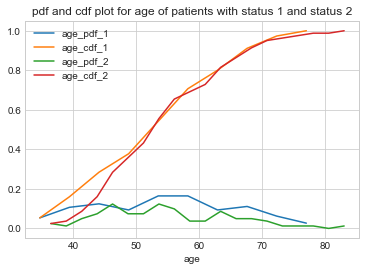

In [101]:
counts,bin_edges=np.histogram(haber_1['age'],bins=10)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts,bin_edges=np.histogram(haber_2['age'],bins=20)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("age")
plt.title("pdf and cdf plot for age of patients with status 1 and status 2")
plt.legend(['age_pdf_1','age_cdf_1','age_pdf_2','age_cdf_2'])

plt.show()

# Observation:
    100% of patients with status 1 are less than 78 years and 10% of patients with status 1 are less than 30
    100% of patients with status 2 are less than 85 years and 3% of patients with status 2 are less than 30 years

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.14814815 0.11111111 0.         0.04938272 0.         0.03703704
 0.         0.08641975 0.         0.09876543 0.09876543 0.
 0.16049383 0.         0.07407407 0.         0.04938272 0.
 0.03703704 0.04938272]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]


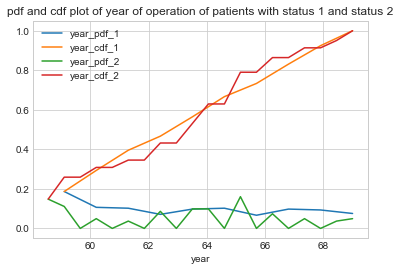

In [88]:
counts,bin_edges=np.histogram(haber_1['year'],bins=10)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges=np.histogram(haber_2['year'],bins=20)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("year")
plt.title("pdf and cdf plot for year of operation of patients with status 1 and status 2")
plt.legend(['year_pdf_1','year_cdf_1','year_pdf_2','year_cdf_2'])

plt.show()

# Observation:
    100% of patients with status 1 operated before 1969 and 25% of patients with status 1 operated before 1960
    100% of patients with status 2 operated before 1969 and 18% of patients with status 2 operated before 1959

# box plot and whiskers

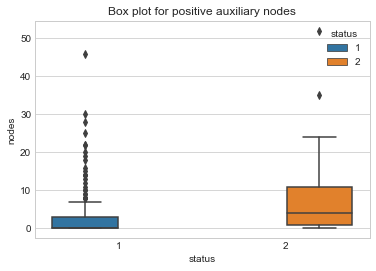

In [103]:
sns.boxplot(x='status',y='nodes',data=haber,hue='status')
plt.title("Box plot for positive auxiliary nodes")
plt.show()

# Obseravtion:
    50% of patients had 0 positive auxiliary nodes with status 1
    75% of patients had 4 positive auxiliary nodes with status 1
    
    25% of patients had 1 positive auxiliary nodes with status 2
    50% of patients had 5 positive auxiliary nodes with status 2
    75% of patients had 11 positive auxiliary nodes with status 2

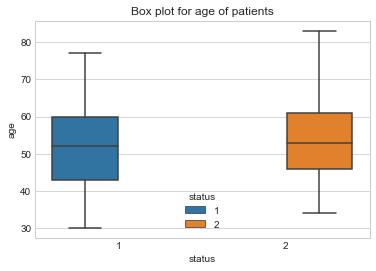

In [104]:
sns.boxplot(x='status',y='age',data=haber,hue='status')
plt.title("Box plot for age of patients")
plt.show()

# Observation:
    25% of patients with status 1 are of age less then 43
    50% of patients with status 1 are of age less then 52
    75% of patients with status 1 are of age less then 60
    
    25% of patients with status 2 are of age less then 45
    50% of patients with status 2 are of age less then 52
    75% of patients with status 2 are of age less then 60

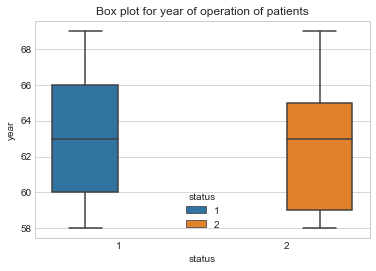

In [105]:
sns.boxplot(x='status',y='year',data=haber,hue='status')
plt.title("Box plot for year of operation of patients")
plt.show()

   # Observation: 
    25% of patients with status 1 had operated before 1960
    50% of patients with status 1 had operated before 1963
    75% of patients with status 1 had operated before 1966
    
    25% of patients with status 2 had operated before 1959
    50% of patients with status 2 had operated before 1963
    75% of patients with status 2 had operated before 1965

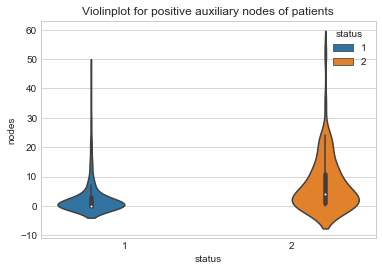

In [106]:
sns.violinplot(x='status',y='nodes',data=haber,hue='status')
plt.title("Violinplot for positive auxiliary nodes of patients")
plt.show()

# Observation:
    density of positive auxiliary nodes is high with node value 0 of status 1
    density of positive auxiliary nodes is high with node value between 0 and 2 of status 2

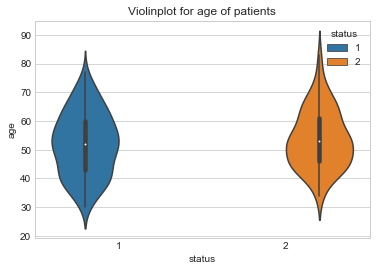

In [107]:
sns.violinplot(x='status',y='age',data=haber,hue='status')
plt.title('Violinplot for age of patients')
plt.show()

# Observation:
    density of age of patients is high in between age 50 to 60 of status 1
    density of age of patients is high in between age 45 to 52 of status 2

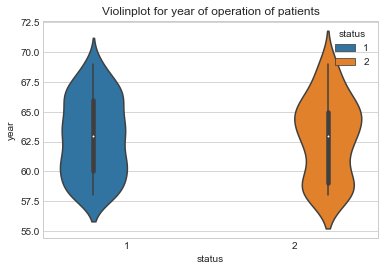

In [108]:
sns.violinplot(x='status',y='year',data=haber,hue='status')
plt.title("Violinplot for year of operation of patients")
plt.show()

# Observation:
    density of year of operation of patients is high in between year 1958 to 1966 of status 1
    density of year of operation of patients is high in 1958 and in between 1963 to 1966 of status 2